In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
print("pandas version " + pd.__version__)
print("numpy version " + np.__version__)
print("scipy version " + scipy.__version__)
print("matplotlib version " + matplotlib.__version__)
print("seaborn version " + sns.__version__)
print("statsmodels version " + sm.__version__)

pandas version 1.0.5
numpy version 1.18.5
scipy version 1.5.0
matplotlib version 3.2.2
seaborn version 0.10.1
statsmodels version 0.11.1


In [3]:
df = pd.read_csv(r"medical_clean.csv")

In [4]:
#pd.options.display.float_format = '{:,.6f}'.format
pd.set_option('display.max_columns', None) #show all columns

In [5]:
df['ReAdmis'].value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

In [6]:
df.shape

(10000, 50)

Some data Prep

In [7]:
df['Initial_admin'] = df['Initial_admin'].str.replace(' Admission', '')
df['Services'] = df['Services'].str.replace(' ', '_')
df['Marital'] = df['Marital'].str.replace(' ','_')

In [8]:
print(df.Population.max())

122814


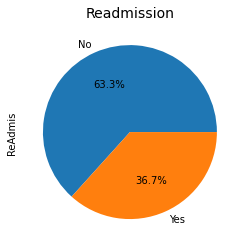

In [9]:
df['ReAdmis'].value_counts().plot.pie(autopct="%.1f%%");
plt.title("Readmission", fontsize=14);

In [10]:
df.groupby('ReAdmis').mean()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
ReAdmis,,,,,,,,,,,,,,,,,,,,,,,
No,3550.541779,49987.470700,38.810183,-91.228998,9739.104249,2.058443,53.263308,40740.257109,17.957993,5.012004,1.010741,0.393619,17.414699,3911.772150,12866.696031,3.531985,3.508608,3.520297,3.516664,3.492497,3.535776,3.497868,3.522982
Yes,7502.458436,50455.863178,38.649146,-91.267379,10355.483510,2.164077,53.940311,40059.521352,17.975079,5.012537,0.985282,0.408013,63.859507,7728.617663,13051.576261,3.496048,3.503407,3.495230,3.512401,3.504497,3.499591,3.487326,3.486781


In [11]:
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'Zip',
       'Lat', 'Lng', 'City', 'State','County','Job','Soft_drink'], axis = 1) 


In [12]:
df = df.dropna(subset=['TimeZone'])

In [13]:
correl  = df.corr()

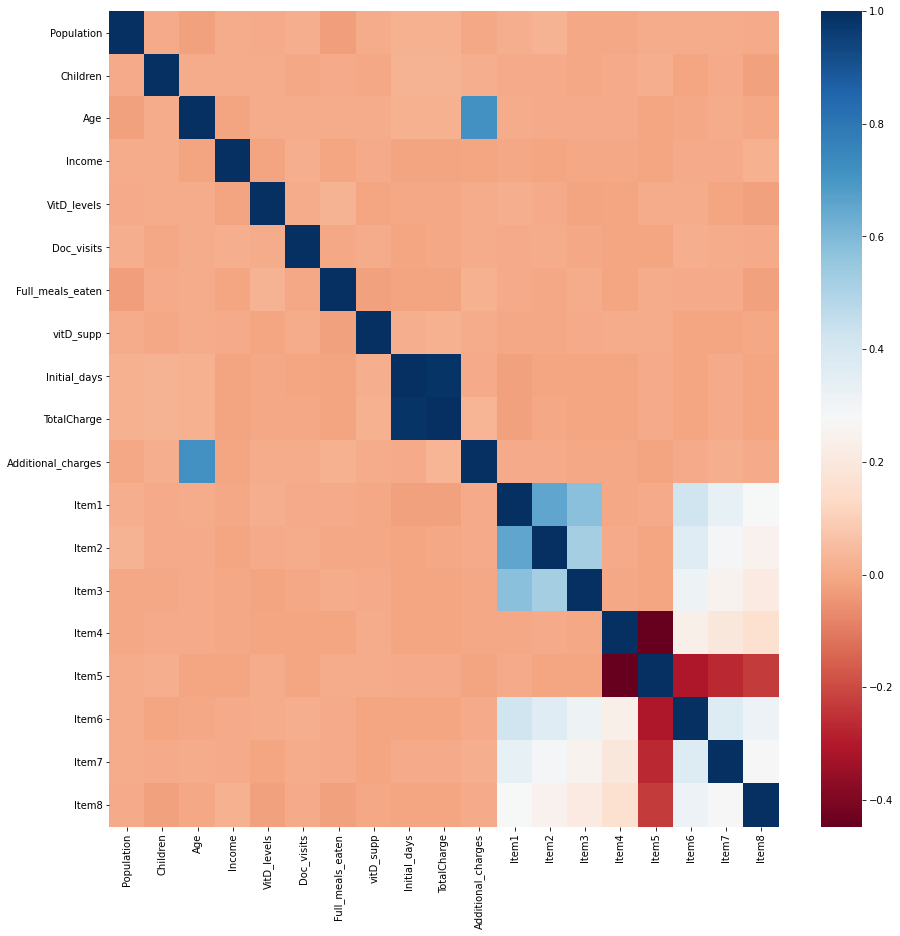

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correl, xticklabels = correl.columns, yticklabels = correl.columns, cmap='RdBu')

Standardize numerical and create dummy variables

In [15]:
df.shape

(10000, 38)

In [16]:
df.head()

,Population,Area,TimeZone,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,2951,Suburban,America/Chicago,1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,Emergency,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood_Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,11303,Urban,America/Chicago,3,51,46805.99,Married,Female,No,18.940352,4,2,1,Emergency,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,17125,Suburban,America/Chicago,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,Elective,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood_Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,2162,Suburban,America/Chicago,0,78,39741.49,Married,Male,No,16.576858,4,1,0,Elective,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood_Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5287,Rural,America/New_York,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Elective,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT_Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [17]:
categorical_data = df.select_dtypes(exclude=np.number)
categorical_data.shape
numerical_data = df.select_dtypes(include=np.number)
numerical_data.shape

(10000, 19)

In [18]:
categorical_data.columns

Index(['Area', 'TimeZone', 'Marital', 'Gender', 'ReAdmis', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services'],
      dtype='object')

In [19]:
numerical_data.columns

Index(['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge',
       'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [20]:
numerical_data.head(5)

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,2951,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,11303,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,17125,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,2162,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5287,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [21]:
df.shape

(10000, 38)

In [22]:
numerical_data = df.select_dtypes(include=np.number)
numerical_data.shape

(10000, 19)

Standardizing the data.

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

num_cols = df.columns[df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
# https://stackoverflow.com/questions/48673402/how-can-i-standardize-only-numeric-variables-in-an-sklearn-pipeline

# Create the Scaler object
# reA = pd.Series(df['ReAdmis']
# st_df = numerical_data
scaler = StandardScaler()

# scaled_df = scaler.fit_transform(st_df)

df[num_cols] = scaler.fit_transform(df[num_cols])
#df.select_dtypes(include=np.number)

In [24]:
df.head(5)

,Population,Area,TimeZone,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,-0.473168,Suburban,America/Chicago,-0.507129,-0.024795,1.615914,Divorced,Male,No,0.583603,0.944647,-0.993387,-0.634713,Emergency,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood_Work,-0.907310,-0.727185,0.765005,-0.502755,-0.489673,-1.463247,-1.462128,0.488380,-0.506139,-0.483672,0.470420
1,0.090242,Urban,America/Chicago,0.417277,-0.121706,0.221443,Married,Female,No,0.483901,-0.967981,0.990609,0.956445,Emergency,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,-0.734595,-0.513228,0.715114,-0.502755,0.476723,-0.494914,0.467946,0.488380,0.462548,-0.483672,-0.489033
2,0.482983,Suburban,America/Chicago,0.417277,-0.024795,-0.915870,Widowed,Female,No,0.046227,-0.967981,-0.001389,-0.634713,Elective,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood_Work,-1.128292,-1.319983,0.698635,-1.471828,0.476723,0.473418,0.467946,-0.482361,0.462548,-0.483672,-0.489033
3,-0.526393,Suburban,America/Chicago,-0.969332,1.186592,-0.026263,Married,Male,No,-0.687811,-0.967981,-0.001389,-0.634713,Elective,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood_Work,-1.244503,-1.460517,0.009004,-0.502755,1.443118,1.441750,-0.497091,0.488380,1.431236,1.474513,1.429874
4,-0.315586,Rural,America/New_York,-0.507129,-1.526914,-1.377325,Widowed,Female,No,-0.260366,-0.011667,-0.993387,2.547602,Elective,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT_Scan,-1.261991,-1.467285,-1.408991,-1.471828,-2.422464,-0.494914,-0.497091,1.459121,-0.506139,0.495421,-0.489033


In [25]:
df = pd.concat([df, pd.get_dummies(df['Area'], prefix='Area' , drop_first=False)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Marital'], prefix='Marital', drop_first=False)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Gender'], prefix='Gender', drop_first=False)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Initial_admin'], prefix='Initial_admin', drop_first=False)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Complication_risk'], prefix='Complication_risk', drop_first=False)], axis=1)
df = pd.concat([df, pd.get_dummies(df['Services'], prefix='Services', drop_first=False)], axis=1)

# df = pd.concat([df, pd.get_dummies(df['HighBlood'], prefix='HighBlood', drop_first=False)], axis=1)
# df = pd.concat([df, pd.get_dummies(df['Stroke'], prefix='Stroke', drop_first=False)], axis=1)
# df = pd.concat([df, pd.get_dummies(df['Overweight'], prefix='Overweight', drop_first=False)], axis=1)
# df = pd.concat([df, pd.get_dummies(df['Arthritis'], prefix='Arthitis, drop_first=False)], axis=1)
# df = pd.concat([df, pd.get_dummies(df['Hyperlipidemia'], prefix='Hyperlipidemia', drop_first=False)], axis=1)
# df = pd.concat([df, pd.get_dummies(df['BackPain'], prefix='BackPain', drop_first=False)], axis=1)
# df = pd.concat([df, pd.get_dummies(df['Anxiety'], prefix='Anxiety', drop_first=False)], axis=1)
# df = pd.concat([df, pd.get_dummies(df['Allergic_rhinitis'], prefix='Allergic_rhinitis', drop_first=False)], axis=1)
# df = pd.concat([df, pd.get_dummies(df['Reflux_esophagitis'], prefix='Reflux_esophagitis', drop_first=False)], axis=1)
# df = pd.concat([df, pd.get_dummies(df['Asthma'], prefix='Asthma', drop_first=False)], axis=1)

#df = pd.concat([df, pd.get_dummies(df['ReAdmis'], prefix='ReAdmis', drop_first=False)], axis=1)
#, drop_first=True

#for KNN, create K dummies instead of K-1
# (https://www.listendata.com/2017/12/k-nearest-neighbor-step-by-step-tutorial.html)

In [26]:
#now that these varibles have been one hot encoded, the orignals can be deleted
df.drop(['Area'],axis=1, inplace=True)
df.drop(['Marital'],axis=1, inplace=True)
df.drop(['Gender'],axis=1, inplace=True)
df.drop(['Initial_admin'],axis=1, inplace=True)
df.drop(['Complication_risk'],axis=1, inplace=True)
df.drop(['Services'],axis=1, inplace=True)
df.drop(['TimeZone'], axis=1, inplace=True)
#df.drop(['ReAdmis'], axis=1, inplace=True)

In [27]:
#these variables only have two possible values and can be encoded as 1 or 0
df['ReAdmis']=df.ReAdmis.map(dict(Yes=1, No=0))
df['HighBlood']=df.HighBlood.map(dict(Yes=1, No=0))
df['Stroke']=df.Stroke.map(dict(Yes=1, No=0))
df['Overweight']=df.Overweight.map(dict(Yes=1, No=0))
df['Arthritis']=df.Arthritis.map(dict(Yes=1, No=0))
df['Diabetes']=df.Diabetes.map(dict(Yes=1, No=0))
df['Hyperlipidemia']=df.Hyperlipidemia.map(dict(Yes=1, No=0))
df['BackPain']=df.BackPain.map(dict(Yes=1, No=0))
df['Anxiety']=df.Anxiety.map(dict(Yes=1, No=0))
df['Allergic_rhinitis']=df.Allergic_rhinitis.map(dict(Yes=1, No=0))
df['Reflux_esophagitis']=df.Reflux_esophagitis.map(dict(Yes=1, No=0))
df['Asthma']=df.Asthma.map(dict(Yes=1, No=0))

In [28]:
df.head(5)

,Population,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Initial_admin_Elective,Initial_admin_Emergency,Initial_admin_Observation,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium,Services_Blood_Work,Services_CT_Scan,Services_Intravenous,Services_MRI
0,-0.473168,-0.507129,-0.024795,1.615914,0,0.583603,0.944647,-0.993387,-0.634713,1,0,0,1,1,0,1,1,1,0,1,-0.907310,-0.727185,0.765005,-0.502755,-0.489673,-1.463247,-1.462128,0.488380,-0.506139,-0.483672,0.470420,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0
1,0.090242,0.417277,-0.121706,0.221443,0,0.483901,-0.967981,0.990609,0.956445,1,0,1,0,0,0,0,0,0,1,0,-0.734595,-0.513228,0.715114,-0.502755,0.476723,-0.494914,0.467946,0.488380,0.462548,-0.483672,-0.489033,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,0.482983,0.417277,-0.024795,-0.915870,0,0.046227,-0.967981,-0.001389,-0.634713,1,0,1,0,1,0,0,0,0,0,0,-1.128292,-1.319983,0.698635,-1.471828,0.476723,0.473418,0.467946,-0.482361,0.462548,-0.483672,-0.489033,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0
3,-0.526393,-0.969332,1.186592,-0.026263,0,-0.687811,-0.967981,-0.001389,-0.634713,0,1,0,1,0,0,0,0,0,1,1,-1.244503,-1.460517,0.009004,-0.502755,1.443118,1.441750,-0.497091,0.488380,1.431236,1.474513,1.429874,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0
4,-0.315586,-0.507129,-1.526914,-1.377325,0,-0.260366,-0.011667,-0.993387,2.547602,0,0,0,0,0,1,0,0,1,0,0,-1.261991,-1.467285,-1.408991,-1.471828,-2.422464,-0.494914,-0.497091,1.459121,-0.506139,0.495421,-0.489033,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0


In [29]:
#Now all the categorical variables that were yes/no have been converted to 1 or 0,
#all the categorical variables with more than 2 classes have been hot oen encoded

In [30]:
df.shape

(10000, 52)

In [31]:
df.to_csv('prepped_med_data.csv')


Train Test Split


In [32]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.25)

x_train = train.drop('ReAdmis', axis=1)
y_train = train['ReAdmis']

x_test = test.drop('ReAdmis', axis = 1)
y_test = test['ReAdmis']

Random Forest Implementation

https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [33]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
#clf=RandomForestClassifier(n_estimators=100)


clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)



#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)



y_pred=clf.predict(x_test)

In [34]:
# n_estimatorsint, default=100 : The number of trees in the forest.

# criterion{“gini”, “entropy”}, default=”gini” :The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

# max_depthint, default=None : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    
# min_samples_splitint or float, default=2:The minimum number of samples required to split an internal node:If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

# min_samples_leafint or float, default=1 : The minimum number of samples required to be at a leaf node

# max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto” : If int, then consider max_features features at each split.
# If float, then max_features is a fraction and round(max_features * n_features) features are considered at each split.
# If “auto”, then max_features=sqrt(n_features).
# If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
# If “log2”, then max_features=log2(n_features).
# If None, then max_features=n_features.

# max_leaf_nodesint, default=None: Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

# min_impurity_decreasefloat, default=0.0 : A node will be split if this split induces a decrease of the impurity greater than or equal to this value.   
    
# bootstrapbool, default=True : Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
    
# oob_scorebool, default=False : Whether to use out-of-bag samples to estimate the generalization accuracy.
    
# n_jobsint, default=None: The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.
    
# verboseint, default=0: Controls the verbosity when fitting and predicting.
    
# warm_startbool, default=False : When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest. See the Glossary.
    
    

In [35]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9816


In [36]:
pd.DataFrame(data={'Predicted': y_pred, 'Actual': y_test}).head(15)

,Predicted,Actual
6493,0,0
5412,1,0
2003,0,0
7445,0,0
5309,1,1
4899,0,0
5236,1,1
9423,1,1
9134,1,1
1900,0,0


In [37]:
from sklearn.metrics import accuracy_score
# print ('accuracy =', metrics.accuracy_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9816


In [38]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro' )

0.9816

In [39]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred,  average='micro')

0.9816

In [40]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,  average='micro')

0.9816

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1577
           1       0.97      0.98      0.98       923

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



In [42]:
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
# probs = y_probas[:, 1]
# print ('ROC AUC =', roc_auc_score(y_test, probs, multi_class='ovo'))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [43]:
multiclass_roc_auc_score(y_test, y_pred)

0.9804729552869631

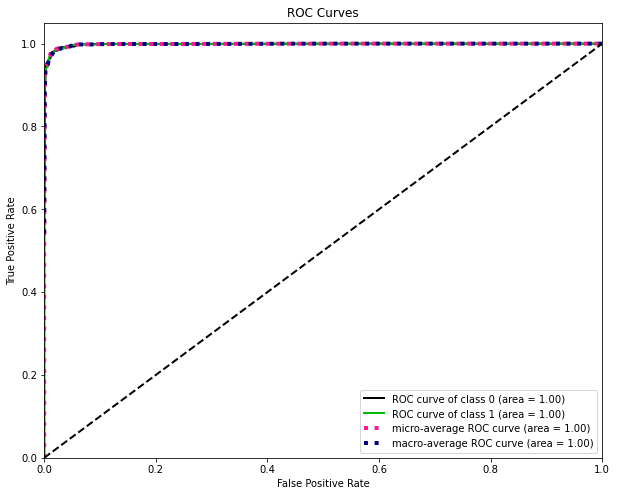

In [44]:
import scikitplot as skplt
y_probas=clf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))

In [45]:
# feature_imp = pd.Series(clf.feature_importances_,index=df.feature_names).sort_values(ascending=False)
# feature_imp

In [46]:
feature_imp = pd.Series(clf.feature_importances_, index =x_train.columns).sort_values(ascending=False)

In [47]:
print(feature_imp)

Initial_days                 0.525700
TotalCharge                  0.384106
Population                   0.007194
Income                       0.006922
Additional_charges           0.006621
VitD_levels                  0.006522
Age                          0.004944
Children                     0.003052
Item4                        0.002817
Item8                        0.002610
Doc_visits                   0.002565
Item5                        0.002539
Item3                        0.002538
Item2                        0.002454
Item1                        0.002437
Item7                        0.002389
Item6                        0.002386
Initial_admin_Emergency      0.002201
Full_meals_eaten             0.002084
vitD_supp                    0.001533
Complication_risk_High       0.001500
Complication_risk_Medium     0.001369
Arthritis                    0.001157
Asthma                       0.001075
Stroke                       0.001073
Reflux_esophagitis           0.000992
Allergic_rhi

In [48]:
top10= feature_imp.nlargest(n=5, keep='first')

No handles with labels found to put in legend.


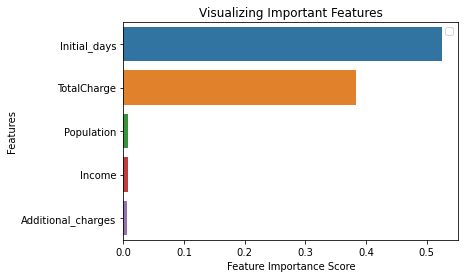

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=top10, y=top10.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

https://www.datacamp.com/community/tutorials/random-forests-classifier-python

New model with only the most important features

In [50]:
# Import train_test_split function
#from sklearn.cross_validation import train_test_split
# Split dataset into features and labels
x=df[['Initial_days', 'TotalCharge', 'Income', 'VitD_levels','Additional_charges']]  # Removed features
y=df['ReAdmis']                                       
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5) # 70% training and 30% test

In [51]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)


RandomForestClassifier(n_estimators=1000, n_jobs=1)

In [52]:
# n_estimatorsint, default=100 : The number of trees in the forest.

# criterion{“gini”, “entropy”}, default=”gini” :The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

# max_depthint, default=None : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    
# min_samples_splitint or float, default=2:The minimum number of samples required to split an internal node:If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

# min_samples_leafint or float, default=1 : The minimum number of samples required to be at a leaf node

# max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto” : If int, then consider max_features features at each split.
# If float, then max_features is a fraction and round(max_features * n_features) features are considered at each split.
# If “auto”, then max_features=sqrt(n_features).
# If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
# If “log2”, then max_features=log2(n_features).
# If None, then max_features=n_features.

# max_leaf_nodesint, default=None: Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

# min_impurity_decreasefloat, default=0.0 : A node will be split if this split induces a decrease of the impurity greater than or equal to this value.   
    
# bootstrapbool, default=True : Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
    
# oob_scorebool, default=False : Whether to use out-of-bag samples to estimate the generalization accuracy.
    
# n_jobsint, default=None: The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.
    
# verboseint, default=0: Controls the verbosity when fitting and predicting.
    
# warm_startbool, default=False : When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest. See the Glossary.
    
    

In [53]:
y_pred=clf.predict(x_test)

In [54]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9808


In [55]:
pd.DataFrame(data={'Predicted': y_pred, 'Actual': y_test}).head(15)

,Predicted,Actual
7054,0,0
442,0,0
3954,0,0
2288,0,0
3196,0,0
6178,1,1
8351,1,1
5658,1,1
2065,0,0
413,0,0


In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9808


In [57]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1586
           1       0.97      0.98      0.97       914

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



In [58]:
probs = clf.predict_proba(x_test)

In [59]:
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
# probs = y_probas[:, 1]
# print ('ROC AUC =', roc_auc_score(y_test, probs, multi_class='ovo'))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [60]:
multiclass_roc_auc_score(y_test, y_pred)

0.9800000551874856

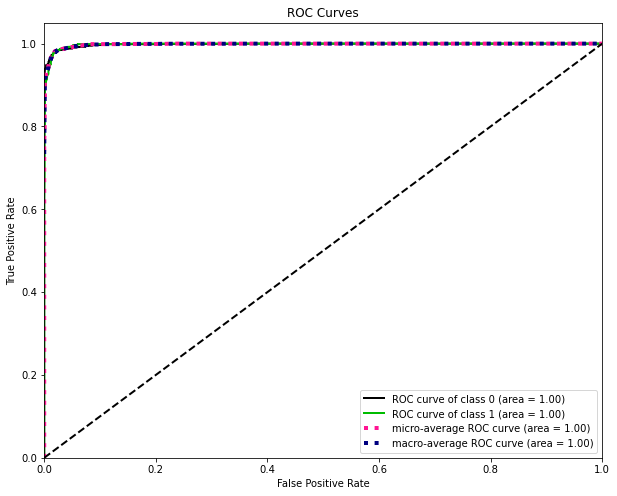

In [61]:
import scikitplot as skplt
y_probas=clf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(10, 8))